# Clustering

_Kevin Siswandi_  
**Fundamentals of Machine Learning**  
June 2020

The goal of cluster analysis is to find groups (representative examples) in data. Examples:
* Mean shift: finding modes based on density estimate
* KMeans
* DBSCAN

There are many ways to classify clustering methods:
* Hierarchical
    - agglomerative (single-linkage, complete linkage, etc.)
    - divisive -- usually less computationally efficient than agglomerative
* Flat
    - crisp (e.g. k-means, mean-shift)
    - fuzzy (e.g. Gaussian Mixture Model)

## Hierarchical Clustering

With hierarchical clustering, we can see at which level clusters merge via a dendogram. Three distance criteria are possible:
1. Single linkage -- shortest distance between any two points in two clusters
2. Complete linkage -- 
3. Average linkage

which usually give different results.

In the **single linkage clustering**, distance between cluster 1 and cluster 2 is found by

$$ \min_{i \in C_1, j \in C_2} d_{i,j} $$

where $d_{ij}$ can be Euclidean, Mahalanobis, etc. This is equivalent to building a minimum spanning tree and truncates it:
- Spanning (a subgraph of a full graph, where each node is connected to any other through the subgraph)
- Minimum (the sum of edge weights used to construct the subgraph is minimal)
- Tree (no cycles)

Truncating is done by eliminating some edges that are above some threshold. This gives the same result as the dendogram approach but can be solved efficiently with Prim's or Kruskal's algorithm. The limitation of single linkage, however, is that noise can 'bridge' or 'chain' clusters.

In **complete linkage clustering**, it works the same but now we use

$$ \max_{i \in C_1, j \in C_2} d_{i,j} $$

The limitation, however, is that it does not allow elongated clusters (produces compact clusters).

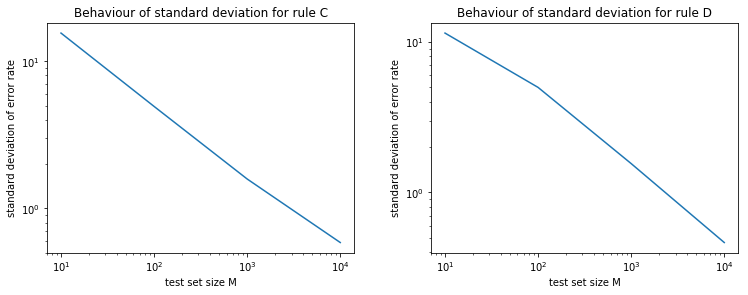

In [10]:
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.plot([10, 100, 1000, 10000], np.mean(values_C[:, [2,4,6,8]], axis = 0))
plt.title('Behaviour of standard deviation for rule C')
plt.ylabel('standard deviation of error rate'); plt.xlabel('test set size M')
plt.loglog()

plt.subplot(1, 2, 2)
plt.plot([10, 100, 1000, 10000], np.mean(values_D[:, [2,4,6,8]], axis = 0))
plt.title('Behaviour of standard deviation for rule D')
plt.ylabel('standard deviation of error rate'); plt.xlabel('test set size M')
plt.loglog()
plt.subplots_adjust(top=0.8, bottom=0, left=0, right=1.6, hspace=0.25,
                    wspace=0.25)
plt.show()

## 1.3 Nearest Neighbor Classification

In [7]:
# pretty big test set
testset = create_data(10000)

In [8]:
# nearest neighbour classifier with training_set of size N = 2
def nn_classifier(x_test, x_train):
    """Nearest neighbor classifier for arbitrary training-set size.
    
    params
    ------
    x_test : float
        A single sample to classify.
    x_train : np.array shape=(samples, 2)
        Training data for the classifier. 
        First column contains feature data, 
        the second one the correct label.
    
    returns
    -------
    label: [0, 1]
        Predicted label of the x_test sample.
        
    """
    diff = np.abs(x_train[:, 0] - x_test)
    idx = np.argmin(diff)
    label = x_train[idx, 1]
    return label

errors = []
for i in range(100):
    # training set with one sample from each class
    x0 = 1 - np.sqrt(1 - np.random.rand()) # class 0
    x1 = np.sqrt(np.random.rand()) # class 1
    train_set = np.array([[x0, 0], 
                          [x1, 1]])
    # evaluate on test set
    n_errors = 0
    for xy in testset:
        if nn_classifier(xy[0], train_set) != xy[1]: n_errors += 1
    errors.append(float(n_errors) / len(testset))
print('Average error: {}% ± {}%'.format(np.round(100 * np.mean(errors), 2), np.round(100 * np.std(errors), 2)))

Average error: 32.45% ± 14.16%


In [9]:
# generate balanced training data
def gen_balanced_data(n):
    X0 = np.empty((n//2, 2))
    X1 = np.empty((n//2, 2))
    for i in range(n//2):
            X0[i, 0] = 1 - np.sqrt(1 - np.random.rand())
            X0[i, 1] = 0
            X1[i, 0] = np.sqrt(np.random.rand())
            X1[i, 1] = 1
    return np.vstack((X0, X1))

In [18]:
# repeat experiment with training_set of size N = 100

errors = []
for i in range(100):
    # training set with 50 samples from each class
    N = 100
    train_set = gen_balanced_data(N)
    # evaluate on test set
    n_errors = 0
    for xy in testset:
        if nn_classifier(xy[0], train_set) != xy[1]: n_errors += 1
    errors.append(float(n_errors) / len(testset))

print('Average error: {}% ± {}%'.format(np.round(100 * np.mean(errors), 2), np.round(100 * np.std(errors), 2)))

Average error: 33.33% ± 2.39%


**Comment**<br>
This experiment reduces the error only by a small amount. To explain this we have to consider that the probabilities for the two classes have high overlap. Therefore, a higher number of training examples will also include a higher number of instances that are located in the "wrong" region by chance. Those points lead to misclassifications. The method does still profit from more training data since proportion of "correct" points in the corresponding region increases, but the benefit is not as big as one would hope. We derive the theoretical asymptotic error in the next homework. Moreover, better results can be achieved with a k-nearest-neighbor method since the majority of several near neighbors is more accurate here. This algorithm is also covered in the next homework.